# Floyd-Warchall

## Algorithm and experiment functions

In [5]:
using BenchmarkTools
using Statistics
using Random

# Graph generating function
function generate_graph_fw(n::Int, edge_prob::Float64 = 0.5)
    A = fill(Inf, n, n)
    for i in 1:n
        A[i,i] = 0.0
        for j in 1:n
            if i != j && rand() < edge_prob
                # Allow negative weights and avoid negative self-loops
                A[i,j] = rand(-5.0:1.0:10.0) 
            end
        end
    end

    return A
end

# Main Algorithm Floyd Warshall
function floydwarshall(A::Matrix{Float64})
    n = size(A, 1)
    dist = copy(A)

    for k in 1:n
        for i in 1:n
            for j in 1:n
                if dist[i, j] > dist[i, k] + dist[k, j]
                    dist[i, j] = dist[i, k] + dist[k, j]
                end
            end
        end
    end

    return dist
end

# Time estimator for later experiments
function estimate_instances_fw(A::Matrix{Float64}, target_time::Float64 = 420.0)
    test_instances = 3
    instance_times = [@elapsed floydwarshall(copy(A)) for _ in 1:test_instances]
    avg_time = mean(instance_times)

    estimated_instances = max(1, Int(round(target_time / avg_time)))

    return estimated_instances
end

# Time measuring function
function measure_fw_time(A::Matrix{Float64}, target_time::Float64 = 420.0)
    instances = estimate_instances_fw(A, target_time)
    instance_times = [@elapsed floydwarshall(deepcopy(A)) for _ in 1:instances]
    avg_time = mean(instance_times)
    median_time = median(instance_times)
    total_time = sum(instance_times)
    
    return avg_time, median_time, total_time, instances, instance_times
end

# Function for runnig whole experiment using additional functions
function run_experiment(edge_prob::Float64 = 0.8, target_time::Float64 = 420.0)
    sizes = [50, 100, 200, 400, 600, 800, 1000, 1200]
    all_times = Vector{Vector{Float64}}() 

    for size in sizes
        A = generate_graph_fw(size, edge_prob)
        avg_time, median_time, total_time, instances, instance_times = measure_fw_time(A, target_time)
        push!(all_times, instance_times)
        println("Size: $size | Instances: $instances | Avg Time: $avg_time | Median Time: $median_time | Total Time: $total_time")
        println("--------------------------------------------------")
    end

    return all_times
end

run_experiment (generic function with 3 methods)

## Run experiment and make violin plot

In [6]:
using StatsPlots

# Run experiment
times = run_experiment(0.75, 420.0)
sizes_series = ["50" "100" "200" "400" "600" "800" "1000" "1200"]

violin(
    sizes_series,
    times,
    xlabel = "Sizes (n)",
    ylabel = "Times (s)",
    title = "Floyd-Warshall Algorithm Performance",
    show_median = true,
    legend = false
)

savefig("plots/floyd_warshall_violin_plot.png")

Size: 50 | Instances: 2150171 | Avg Time: 0.00022534704295611835 | Median Time: 0.0001893 | Total Time: 484.5346767
--------------------------------------------------
Size: 100 | Instances: 237987 | Avg Time: 0.0016092932744225525 | Median Time: 0.0013116 | Total Time: 382.9908785
--------------------------------------------------
Size: 200 | Instances: 40647 | Avg Time: 0.01572601924619283 | Median Time: 0.0154856 | Total Time: 639.2155043
--------------------------------------------------
Size: 400 | Instances: 2923 | Avg Time: 0.14072288125213822 | Median Time: 0.1380586 | Total Time: 411.33298190000005
--------------------------------------------------
Size: 600 | Instances: 773 | Avg Time: 0.42844848538163005 | Median Time: 0.4234653 | Total Time: 331.19067920000003
--------------------------------------------------
Size: 800 | Instances: 320 | Avg Time: 1.1246657853125 | Median Time: 1.1075251000000002 | Total Time: 359.89305129999997
---------------------------------------------

"c:\\VSCodeProjects\\Julia\\path-finding\\plots\\floyd_warshall_violin_plot.png"

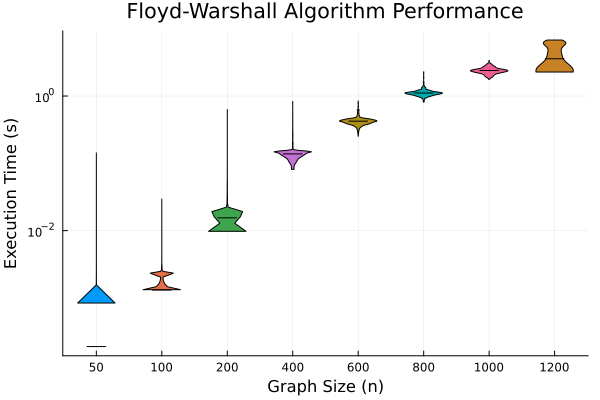

In [11]:
# With log scale
violin(
    sizes_series,
    times,
    xlabel = "Graph Size (n)",
    ylabel = "Execution Time (s)",
    title = "Floyd-Warshall Algorithm Performance",    
    show_median = true,
    legend = false,
    yscale = :log10,
)